In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.husl_palette(s=1)
sns.set(style='whitegrid', palette=palette, context='talk')

### Load data

In [2]:
df = pd.read_csv('train.csv', parse_dates=True)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Train-test-split

In [4]:
X = df.iloc[:,:]
y = df['count']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, X_val.shape, y_train.shape, y_val.shape
X_train.reset_index(inplace=True)

### Exploratory data analysis

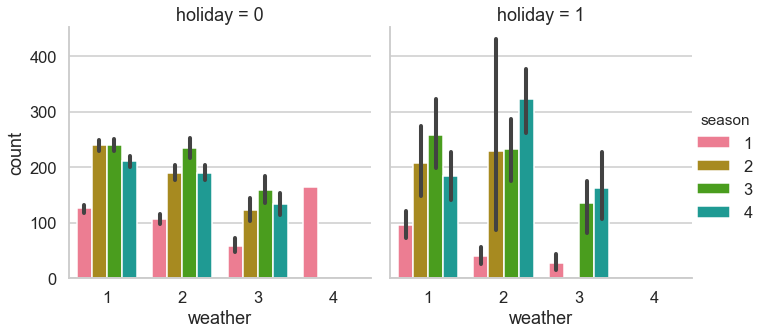

In [5]:
g = sns.catplot(x='weather', y='count', kind='bar', hue = 'season', col = 'holiday', data=X_train)

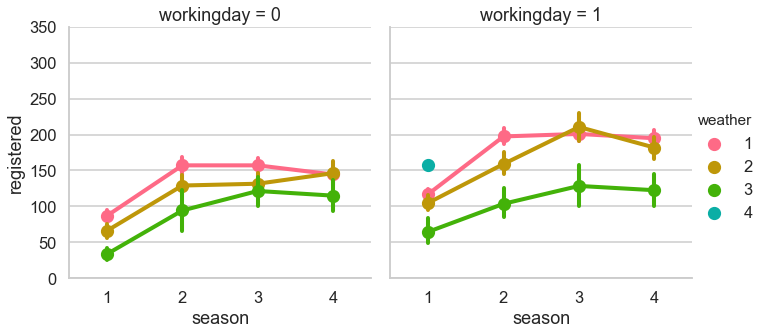

In [6]:
# Registered users
g = sns.catplot(x='season', y='registered', kind='point', hue = 'weather', col = 'workingday', data=X_train)
g.set(ylim=(0, 350))

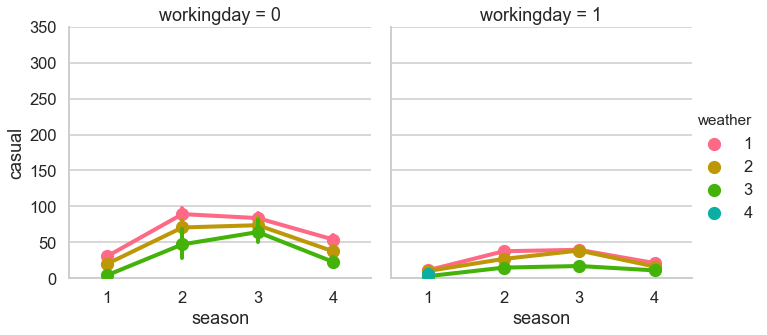

In [7]:
# Casual users
g = sns.catplot(x='season', y='casual', kind='point', hue = 'weather', col = 'workingday', data=X_train)
g.set(ylim=(0, 350))

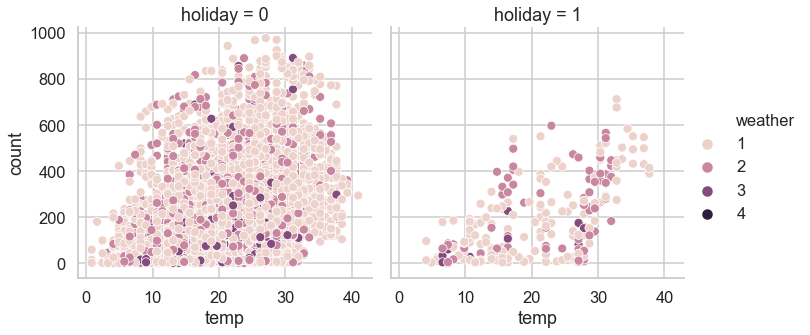

In [8]:
sns.relplot(x="temp", y="count", hue="weather", col="holiday", data=X_train)

In [9]:
#sns.pairplot(data=X_train)

## Feature Engineering

Shift temperature too temperature with maximum count = 35

In [183]:
X_train['atemp_shift'] = abs(X_train['atemp'] - 35)

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


too hot feature

In [219]:
hot = []
for i in range(len(X_train['atemp'])):
    if X_train['atemp'][i] > 36:
        hot.append(X_train['atemp'][i])
    else:
        hot.append(36)
X_train['hot'] = hot

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [184]:
X_train['datetime'] = pd.to_datetime(X_train['datetime'])
#X_train[['datetime']]

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
# Extract all time information
X_train['datetime_hour'] = X_train.loc[:,'datetime'].dt.hour # important _ onehot
X_train['datetime_day'] = X_train['datetime'].dt.day
X_train['datetime_month'] = X_train['datetime'].dt.month # use month as onehot or factorized instead of season
X_train['datetime_year'] = X_train['datetime'].dt.year # maybe instead of timestamp
X_train['datetime_weekdays'] = X_train['datetime'].dt.day_name()
X_train['timestamp'] = X_train['datetime'].astype(int) / 1_000_000_000_000_000_000 # use to account for increasing count over time

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

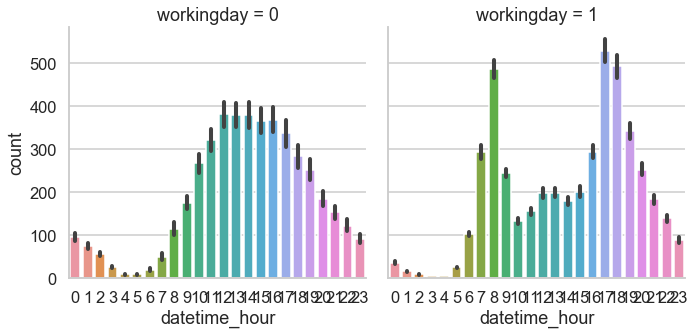

In [12]:
g = sns.catplot(x='datetime_hour', y='count', kind='bar', col = 'workingday', data=X_train)

#### One-hot encoding

In [31]:
X_train['hour_workday'] = X_train['datetime_hour'] * X_train['workingday']
X_train['hour_weekend'] = X_train['datetime_hour'] * (X_train['workingday'] - 1) * (-1)
X_train.head()

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,...,datetime_month,datetime_year,datetime_weekdays,timestamp,hour_workday,hour_weekend,cas_pred,reg_pred,count_pred,count_residual
0,3036,2011-07-15 10:00:00,3,0,1,2,27.06,31.060,61,11.0014,...,7,2011,Friday,1.310724,10,0,30.873060,88.216500,119.089560,-46.910440
1,4817,2011-11-13 19:00:00,4,0,0,1,20.50,24.240,29,23.9994,...,11,2011,Sunday,1.321211,0,19,50.366958,162.903229,213.270187,56.270187
2,5745,2012-01-14 13:00:00,1,0,0,1,9.02,10.605,44,19.0012,...,1,2012,Saturday,1.326546,0,13,29.671819,140.296429,169.968248,-50.031752
3,2327,2011-06-04 21:00:00,2,0,0,2,27.06,31.060,47,7.0015,...,6,2011,Saturday,1.307221,0,21,42.913717,100.020083,142.933800,-42.066200
4,2838,2011-07-07 04:00:00,3,0,1,1,26.24,28.790,89,7.0015,...,7,2011,Thursday,1.310011,4,0,1.925669,4.506885,6.432554,2.432554


In [50]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohc.fit(X_train[['datetime_month', 'weather', 'hour_workday', 'hour_weekend']])
onehot = ohc.transform(X_train[['datetime_month', 'weather', 'hour_workday', 'hour_weekend']])
onehot_columns = ohc.get_feature_names(['month', 'weather', 'hour_workday', 'hour_weekend'])

onehot = pd.DataFrame(onehot, columns=onehot_columns)
onehot_weather = onehot.filter(regex='^weather').multiply(X_train['datetime_year'], axis="index")
onehot_hour = onehot.filter(regex='^hour').multiply(X_train['datetime_year'], axis="index")
onehot_monthyear = onehot.filter(regex='^month').multiply(X_train['datetime_year'], axis="index")
onehot

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,hour_weekend_14,hour_weekend_15,hour_weekend_16,hour_weekend_17,hour_weekend_18,hour_weekend_19,hour_weekend_20,hour_weekend_21,hour_weekend_22,hour_weekend_23
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8706,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Set up the model

In [16]:
from sklearn.linear_model import LinearRegression

In [246]:
X_train_model = X_train[['datetime_year', 'workingday', 'atemp_shift', 'humidity', 'windspeed']]
X_train_model_onehot = pd.concat([X_train_model, onehot], axis=1)
onehot.shape, X_train_model.shape, X_train_model_onehot.shape

((8708, 64), (8708, 5), (8708, 69))

#### Scale the data

In [239]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # scales each column to minimum 0.0 and maximum 1.0. Makes sure all data fits together.
scaler.fit(X_train_model_onehot)
X_scaled = scaler.transform(X_train_model_onehot) # later just use transform on X_test, DO NOT FIT AGAIN

In [240]:
y_train_cas = X_train['casual']
lr_cas = LinearRegression()
lr_cas.fit(X_scaled, np.log(y_train_cas+1))
lr_cas.score(X_scaled, np.log(y_train_cas+1))

0.8536337445741977

In [241]:
y_train_reg = X_train['registered']
lr_reg = LinearRegression()
lr_reg.fit(X_scaled, np.log(y_train_reg+1))
lr_reg.score(X_scaled, np.log(y_train_reg+1))

0.9397610481474821

In [242]:
X_train_model_onehot.shape, y_train_cas.shape

((8708, 69), (8708,))

Cross validation

In [225]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_reg, X_scaled, np.log(y_train+1), cv=4, scoring='r2')
scores

array([-5.96877934e+19,  9.37748029e-01,  9.35363672e-01,  9.38204733e-01])

In [226]:
scores.mean().round(3), scores.std().round(3)

(-1.4921948347182764e+19, 2.5845572685238985e+19)

In [243]:
X_train['cas_pred'] = np.exp(lr_cas.predict(X_scaled))
X_train['reg_pred'] = np.exp(lr_reg.predict(X_scaled))
X_train['count_pred'] = X_train['cas_pred'] + X_train['reg_pred']
X_train['count_pred']

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

0       118.393625
1       212.849561
2       169.100573
3       144.072430
4         6.455956
           ...    
8703     61.055364
8704     63.424576
8705    310.129649
8706    123.101923
8707    113.674748
Name: count_pred, Length: 8708, dtype: float64

In [244]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_train, X_train['count_pred']))

0.36386658288210727

In [245]:
from sklearn.metrics import r2_score
r2_score(y_train, X_train['count_pred'])

0.8909176968001425

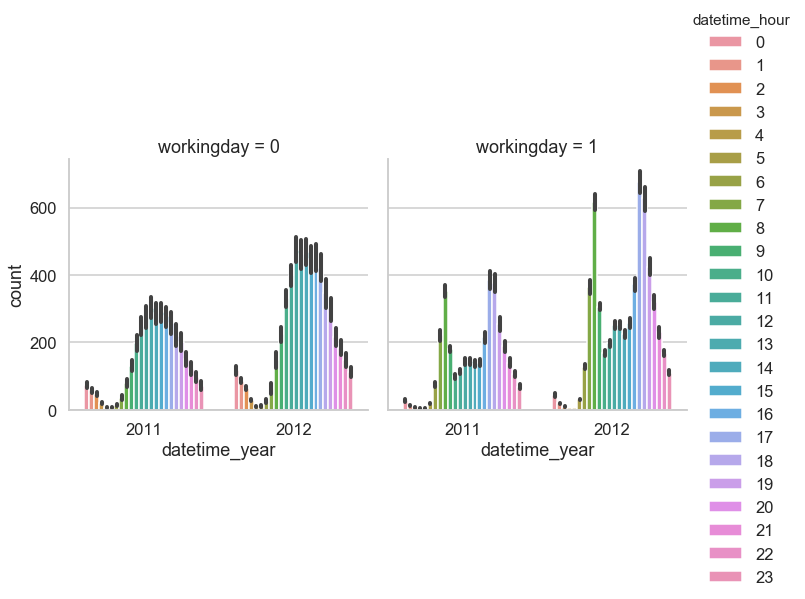

In [173]:
g = sns.catplot(x='datetime_year', y='count', kind='bar', hue = 'datetime_hour', col = 'workingday', data=X_train)

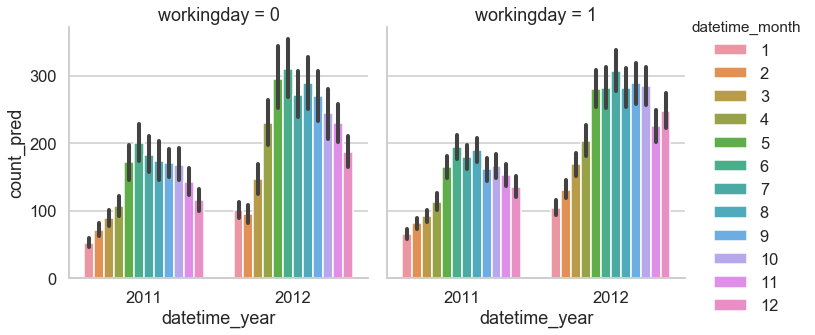

In [174]:
g = sns.catplot(x='datetime_year', y='count_pred', kind='bar', hue = 'datetime_month', col = 'workingday', data=X_train)

In [175]:
lr_reg.coef_, lr_cas.coef_

(array([ 5.16589025e-01, -1.01461544e+00, -7.06092182e-01, -2.05454999e-01,
        -1.68446443e-01,  3.59996481e+10,  3.59996481e+10,  3.59996481e+10,
         3.59996481e+10,  3.59996481e+10,  3.59996481e+10,  3.59996481e+10,
         3.59996481e+10,  3.59996481e+10,  3.59996481e+10,  3.59996481e+10,
         3.59996481e+10, -1.05513585e+11, -1.05513585e+11, -1.05513585e+11,
        -1.05513585e+11,  1.37298523e+11,  1.37298523e+11,  1.37298523e+11,
         1.37298523e+11,  1.37298523e+11,  1.37298523e+11,  1.37298523e+11,
         1.37298523e+11,  1.37298523e+11,  1.37298523e+11,  1.37298523e+11,
         1.37298523e+11,  1.37298523e+11,  1.37298523e+11,  1.37298523e+11,
         1.37298523e+11,  1.37298523e+11,  1.37298523e+11,  1.37298523e+11,
         1.37298523e+11,  1.37298523e+11,  1.37298523e+11,  1.37298523e+11,
         1.37298523e+11, -4.07871577e+10, -4.07871577e+10, -4.07871577e+10,
        -4.07871577e+10, -4.07871577e+10, -4.07871577e+10, -4.07871577e+10,
        -4.0

In [204]:
X_train['count_residual'] = X_train['count_pred'] - X_train['count']

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


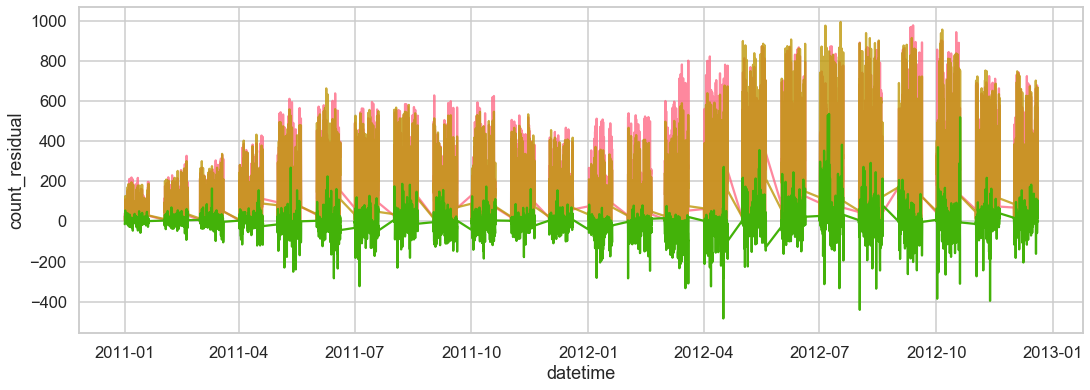

In [205]:
fig = plt.figure(figsize=(18,6))
ax = sns.lineplot(x='datetime', y='count', data=X_train, alpha = 0.8)
ax = sns.lineplot(x='datetime', y='count_pred', data=X_train, alpha = 0.8)
ax = sns.lineplot(x='datetime', y='count_residual', data=X_train)
#ax.set_xlim(pd.Timestamp('2011-04-01'), pd.Timestamp('2011-09-01'))

In [206]:
X_train['count_residual'].min(), X_train['count_residual'].max(),  X_train['count_residual'].isna().sum()

(-483.45625032699706, 535.6401096089651, 0)

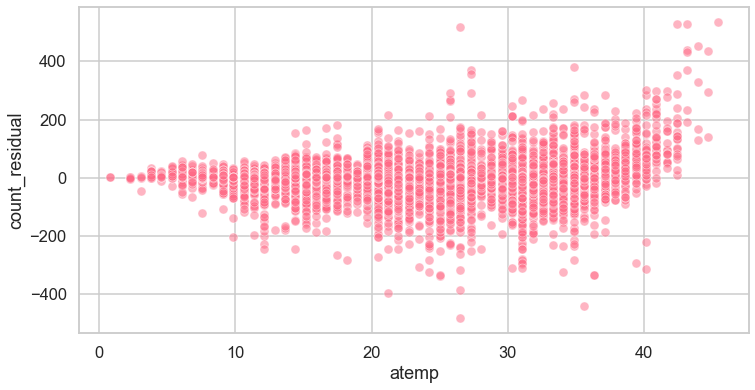

In [207]:
fig = plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='atemp', y='count_residual', data=X_train, alpha = 0.5)

#ax = sns.scatterplot(x='atemp', y='count_residual', data=X_train[X_train['holiday'] == 1], alpha = 1)

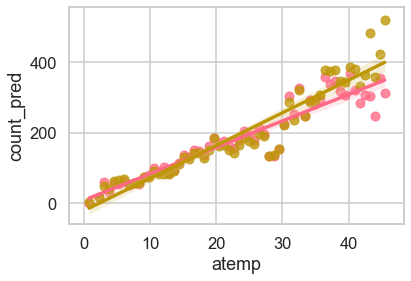

In [180]:
temp_penalty = X_train.groupby('atemp')[['atemp', 'count','count_pred', 'count_residual']].mean()
sns.regplot(x='atemp', y='count', data=temp_penalty)
sns.regplot(x='atemp', y='count_pred', data=temp_penalty)
#sns.catplot(x='atemp', y='count_residual', data=temp_penalty)

In [181]:
temp_penalty

,atemp,count,count_pred,count_residual
atemp,,,,
0.760,0.760,1.000000,3.557265,2.557265
2.275,2.275,19.000000,18.628285,-0.371715
3.030,3.030,59.500000,49.545136,-9.954864
3.790,3.790,31.615385,41.781407,10.166022
4.545,4.545,56.444444,61.929927,5.485483
5.305,5.305,55.260870,65.835496,10.574626
6.060,6.060,63.150000,68.646527,5.496527
6.820,6.820,53.209302,54.580018,1.370715
7.575,7.575,56.557377,57.649788,1.092411


In [65]:
X_train[X_train['count_residual'] < -300]

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,...,datetime_month,datetime_year,datetime_weekdays,timestamp,hour_workday,hour_weekend,cas_pred,reg_pred,count_pred,count_residual
1801,9536,2012-10-01 17:00:00,4,0,1,3,22.96,26.515,60,16.9979,...,10,2012,Monday,1.349111,17,0,33.133016,426.214647,459.347662,-396.652338
2706,7150,2012-04-16 07:00:00,2,1,0,1,21.32,25.000,83,8.9981,...,4,2012,Monday,1.334560,0,7,11.984064,38.851406,50.835469,-336.164531
3413,8936,2012-08-14 17:00:00,3,0,1,3,31.16,36.365,66,16.9979,...,8,2012,Tuesday,1.344964,17,0,47.793879,435.326176,483.120056,-328.879944
3473,9967,2012-10-19 16:00:00,4,0,1,3,25.42,30.305,69,23.9994,...,10,2012,Friday,1.350662,16,0,31.944765,229.415652,261.360417,-303.639583
3510,2783,2011-07-04 21:00:00,3,1,0,2,30.34,34.090,62,7.0015,...,7,2011,Monday,1.309813,0,21,40.808755,90.950805,131.759560,-325.240440
4585,8625,2012-08-01 18:00:00,3,0,1,3,31.16,35.605,62,15.0013,...,8,2012,Wednesday,1.343844,18,0,38.211882,401.015260,439.227142,-451.772858
4935,6918,2012-04-06 14:00:00,2,0,1,1,19.68,23.485,29,26.0027,...,4,2012,Friday,1.333721,14,0,42.553860,139.340443,181.894303,-308.105697
5064,6724,2012-03-17 11:00:00,1,0,0,2,21.32,25.000,77,8.9981,...,3,2012,Saturday,1.331982,0,11,78.383561,180.176911,258.560473,-326.439527
6296,8244,2012-07-04 21:00:00,3,1,0,1,34.44,40.150,53,8.9981,...,7,2012,Wednesday,1.341436,0,21,83.140840,183.132309,266.273150,-317.726850
6812,8528,2012-07-16 17:00:00,3,0,1,3,31.16,36.365,66,39.0007,...,7,2012,Monday,1.342458,17,0,42.140639,387.108843,429.249482,-325.750518
